In [3]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
#loading the dataset
df=pd.read_csv("../input/pgh-traffic-prediction/pgh_train.csv")
df

,from.x,from.y,to.x,to.y,speed,time,is.weekday
0,-80.010193,40.439438,-80.009608,40.439757,27.603437,8,1
1,-79.975452,40.435881,-79.966978,40.435817,53.779673,8,1
2,-79.926506,40.427954,-79.911553,40.425766,39.520281,8,1
3,-80.010193,40.439438,-80.000976,40.436302,24.878792,8,1
4,-80.007891,40.448433,-80.004527,40.449137,41.973019,8,1
...,...,...,...,...,...,...,...
565,-79.895381,40.425906,-79.892002,40.427876,51.251842,20,0
566,-79.895487,40.426092,-79.891258,40.427202,38.864311,20,0
567,-79.895487,40.426092,-79.891258,40.427202,46.044388,20,0
568,-79.926933,40.426905,-79.927907,40.427623,23.390307,20,0


In [5]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from.x      570 non-null    float64
 1   from.y      570 non-null    float64
 2   to.x        570 non-null    float64
 3   to.y        570 non-null    float64
 4   speed       570 non-null    float64
 5   time        570 non-null    int64  
 6   is.weekday  570 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 31.3 KB


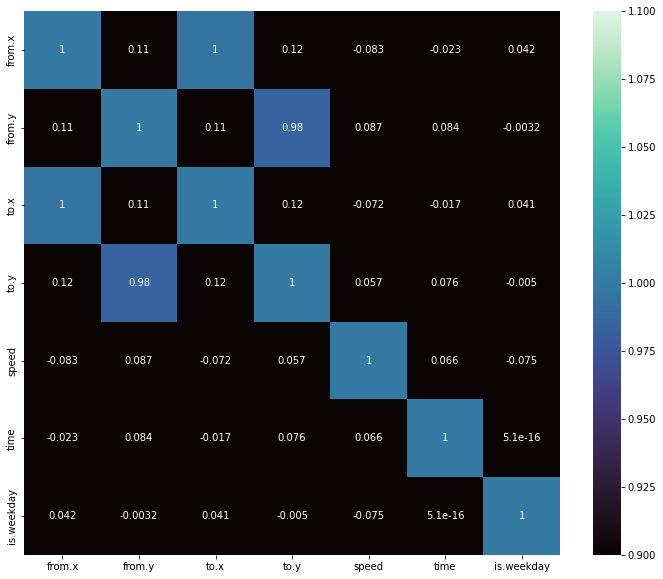

In [8]:
#Visualizating correlation

plt.figure(figsize=(12,10))
#cresating heatmap to visualizaton the correlation


sns.heatmap(df.corr(),annot=True,vmin=1.0,cmap='mako')
plt.show()

In [42]:
#preprocessing 
def preprocess_inputs(df):
    df=df.copy()
    #Split df into x and y
    y=df['speed']
    x=df.drop('speed',axis=1)
    #train_test split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)
    #Scaling x
    scaler=StandardScaler()
    #scaling the data
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)
    
    
    
    return x_train,x_test,y_train,y_test


In [43]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)


In [22]:
print(x_train.shape)
print(x_test.shape)

(399, 7)
(171, 7)


In [44]:
x_test

,from.x,from.y,to.x,to.y,time,is.weekday
565,2.018428,-0.787337,2.039036,-0.687339,1.220166,-0.992509
364,1.423760,-0.784716,1.363973,-0.787130,-1.220166,-0.992509
444,0.103114,-0.312781,0.247431,-0.394519,0.000000,-0.992509
260,-0.610595,0.018651,-0.631486,0.030958,1.220166,1.007547
65,0.249650,0.972855,0.252237,1.029585,-1.220166,1.007547
...,...,...,...,...,...,...
374,-1.252150,-0.462244,-1.285779,-0.473429,-1.220166,-0.992509
142,0.149649,0.838016,0.132856,0.876543,0.000000,1.007547
407,-0.490357,-0.175318,-0.505577,-0.195231,0.000000,-0.992509
6,-0.418428,0.407962,-0.420927,0.630090,-1.220166,1.007547


In [35]:
y_train

11     28.033636
285    52.736325
430    47.225966
556    14.175614
58     33.340474
         ...    
129    16.850889
144    13.373810
72     23.649053
235    35.804771
37     10.198333
Name: speed, Length: 399, dtype: float64

In [36]:
#training the model with scaling
models={
    'Linear': LinearRegression(),
    'K-Nearest Neighbors':KNeighborsRegressor(),
    'Neural Network':MLPRegressor(),
    'Support Vector Machine(Linear)':LinearSVR(),
    'Support Vector Machine(RBF)':SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [45]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name,'trained')

Linear trained
K-Nearest Neighbors trained
Neural Network trained
Support Vector Machine(Linear) trained
Support Vector Machine(RBF) trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained


In [46]:
for name,model in models.items():
    print(name+ 'R^2 Score:{:5f}'.format(model.score(x_test,y_test)))

LinearR^2 Score:0.000289
K-Nearest NeighborsR^2 Score:0.111566
Neural NetworkR^2 Score:-0.104157
Support Vector Machine(Linear)R^2 Score:-0.027034
Support Vector Machine(RBF)R^2 Score:0.065630
Decision TreeR^2 Score:0.430387
Random ForestR^2 Score:0.613383
Gradient BoostingR^2 Score:0.490879
